In [1]:
import transformers
print(transformers.__version__)

4.38.1


#### 2.

In [2]:
from transformers import pipeline
sentiment = pipeline('sentiment-analysis')
sentiment.model

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [3]:
print(sentiment(["I like Olympic games as it's very exciting."]))
print(sentiment(["I'm against to hold Olympic games in Tokyo in terms of preventing the covid19 to be spread."]))

[{'label': 'POSITIVE', 'score': 0.9998026490211487}]
[{'label': 'NEGATIVE', 'score': 0.9791859984397888}]


#### 3.

In [4]:
from transformers import pipeline

qa = pipeline('question-answering')

olympic_text = """
The 2020 Summer Olympics (Japanese: 2020年夏季オリンピック, Hepburn: Nisen Nijū-nen Kaki Orinpikku), officially the Games of the XXXII Olympiad (第三十二回オリンピック競技大会, Dai Sanjūni-kai Orinpikku Kyōgi Taikai) and branded as Tokyo 2020 (東京2020), is an ongoing international multi-sport event being held from 23 July to 8 August 2021 in Tokyo, Japan, with some preliminary events that began on 21 July.

Tokyo was selected as the host city during the 125th IOC Session in Buenos Aires, Argentina, on 7 September 2013.[3] Originally scheduled to take place from 24 July to 9 August 2020, the event was postponed to 2021 in March 2020 as a result of the COVID-19 pandemic, the first such instance in the history of the Olympic Games (previous games had been cancelled but not rescheduled).[4] However, the event retains the Tokyo 2020 name for marketing and branding purposes.[5] It is being held largely behind closed doors with no public spectators permitted due to the declaration of a state of emergency.[b] The Summer Paralympics will be held between 24 August and 5 September 2021, 16 days after the completion of the Olympics.[6]

The 2020 Games are the fourth Olympic Games to be held in Japan, following the Tokyo 1964 (Summer), Sapporo 1972 (Winter), and Nagano 1998 (Winter) games.[c] Tokyo is the first city in Asia to hold the Summer Games twice. The 2020 Games are the second of three consecutive Olympics to be held in East Asia, following the 2018 Winter Olympics in Pyeongchang, South Korea, and preceding the 2022 Winter Olympics in Beijing, China.

The 2020 Games introduced new competitions and re-introduced competitions that once were held but were subsequently removed. New ones include 3x3 basketball, freestyle BMX and mixed gender team events in a number of existing sports, as well as the return of madison cycling for men and an introduction of the same event for women. New IOC policies also allow the host organizing committee to add new sports to the Olympic program for just one Games. The disciplines added by the Japanese Olympic Committee are baseball and softball, karate, sport climbing, surfing, and skateboarding, the last four of which make their Olympic debuts.[7]

Bermuda, the Philippines, and Qatar won their first-ever Olympic gold medals.[8][9][10] San Marino, Turkmenistan, and Burkina Faso won their first-ever Olympic medals.[11][12][13]

"""
print(qa(question="In what year was Tokyo selected to host the Olympic Games?", context=olympic_text))


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.965682327747345, 'start': 495, 'end': 499, 'answer': '2013'}


## Distill Bert

#### 4.

In [5]:
import torch
torch.cuda.is_available()

True

In [6]:
!pip install torchtext==0.17.0

In [7]:
!pip install portalocker==2.7.0

In [8]:
!pip install accelerate -U

In [9]:
from torchtext.datasets import IMDB

train_iter = IMDB(split = 'train')
test_iter = IMDB(split = 'test')

In [10]:
import random
random.seed(6)

train_lists = list(train_iter)
test_lists = list(test_iter)

train_lists_small = random.sample(train_lists, 1000)
test_lists_small = random.sample(test_lists, 1000)

print(train_lists_small[0])
print(test_lists_small[0])

(2, "I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.")
(1, 'This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with that? <br /><br />Tru

#### 5.

In [11]:
train_texts = []
train_labels = []

for label, text in train_lists_small :
    train_labels.append(1 if label == 2 else 0)
    train_texts.append(text)


test_texts = []
test_labels = []

for label, text in test_lists_small :
    test_labels.append(1 if label == 2 else 0)
    test_texts.append(text)

print(train_texts[0])
print(train_labels[0])
print(test_texts[0])
print(test_labels[0])

I LOVED this movie! I am biased seeing as I am a huge Disney fan, but I really enjoyed myself. The action takes off running in the beginning of the film and just keeps going! This is a bit of a departure for Disney, they don't spend quite as much time on character development (my husband pointed this out)and there are no musical numbers. It is strictly action adventure. I thoroughly enjoyed it and recommend it to anyone who loves Disney, be they young or old.
1
This was an abysmal show. In short it was about this kid called Doug who guilt-tripped a lot. Seriously he could feel guilty over killing a fly then feeling guilty over feeling guilty for killing the fly and so forth. The animation was grating and unpleasant and the jokes cheap. <br /><br />It aired here in Sweden as a part of the "Disney time" show and i remember liking it some what but then i turned 13.<br /><br />I never got why some of the characters were green and purple too. What was up with that? <br /><br />Truly a horri

#### 6.

In [12]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(train_texts, train_labels, test_size=.2,
                                                                    random_state=3)
print(len(train_texts))
print(len(train_labels))
print(len(val_texts))
print(len(val_labels))


800
800
200
200


#### 7.

In [13]:
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [14]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True)
val_encodings = tokenizer(val_texts, truncation=True, padding=True)
test_encodings = tokenizer(test_texts, truncation=True, padding=True)

print(train_encodings["input_ids"][0][:5])
print(tokenizer.decode(train_encodings["input_ids"][0][:5]))

[101, 4937, 11350, 2038, 2048]
[CLS] cat soup has two


#### 8.

In [17]:
class IMDbDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encoding = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx])

        return item

    def __len__(self):
        return len(self.labels)


train_dataset = IMDbDataset(train_encodings, train_labels)
val_dataset = IMDbDataset(val_encodings, val_labels)
test_dataset = IMDbDataset(test_encodings, test_labels)

In [18]:
for i in train_dataset:
    print(i)
    break

{'input_ids': tensor([  101,  4937, 11350,  2038,  2048,  1000,  7592, 14433,  1000,  1011,
         2828, 18401,  2015, 28866,  2075,  2006,  1037, 13576,  4440,  2083,
         1996, 25115,  1010,  2073,  2505,  2064,  4148,  1010,  1998,  2515,
         1012,  2023,  2568,  1011,  4440,  4691,  4004,  2460,  3594,  2053,
        13764,  8649,  1010,  4942, 21532,  2773, 22163,  2612,  1012,  2045,
         2003,  2053,  2126,  1997,  7851,  2023, 17183, 14088,  9476,  3272,
         2000,  2425,  2017,  2000,  2156,  2009,  2005,  4426,  1012,  1998,
         2191,  2469,  2053,  2028,  2104,  2184,  2003,  1999,  1996,  2282,
         1012,  4487,  6491,  6633,  5677,  3672,  1998,  2064,  3490, 10264,
         2964,  1998, 18186,  1998,  9576,  2854,  1998,  5573,  2331,  1998,
         2655,  3560, 27770,  2005,  2500,  2024,  2691,  6991,  1012,  7481,
         1012,  3383,  1996,  2087, 13432,  3746,  2003,  2008,  1997,  2019,
        10777,  3605,  1997,  2300,  2008,  1996, 

#### 9.

In [19]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

#### 10.

In [20]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir = './results',
    num_train_epochs = 8,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

#### 11.

In [21]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
!nvidia-smi

Wed Mar  6 06:18:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0              26W /  70W |    395MiB / 15360MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [26]:
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

label_dict = {1: 'pos', 0: 'neg'}

print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])


['pos', 'neg', 'neg']
SequenceClassifierOutput(loss=None, logits=tensor([[-1.2816,  1.1068],
        [ 0.6307, -0.6000],
        [ 1.1771, -1.1648]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [25]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()

Step,Training Loss
10,0.687400
20,0.695500
30,0.690100
40,0.691400
50,0.686100
60,0.679700
70,0.669300
80,0.645300
90,0.591500
100,0.516200


TrainOutput(global_step=400, training_loss=0.2707957991212606, metrics={'train_runtime': 290.9054, 'train_samples_per_second': 22.0, 'train_steps_per_second': 1.375, 'total_flos': 847791351398400.0, 'train_loss': 0.2707957991212606, 'epoch': 8.0})

In [27]:
input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)
outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

label_dict = {1: 'pos', 0: 'neg'}

print([label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()])

['pos', 'neg', 'neg']


#### 13.

In [31]:
def test_inference(model, tokenizer):
    input_tokens = tokenizer(["I feel fantastic", "My life is going something wrong", "I have not figured out what the chosen title has to do with the movie."], truncation=True, padding=True)
    outputs = model(torch.tensor(input_tokens['input_ids']).to(device))
    label_dict = {1: 'pos', 0: 'neg'}

    return [label_dict[i] for i in torch.argmax(outputs['logits'], axis=1).cpu().numpy()]

In [34]:
from torch.utils.data import DataLoader
from transformers import DistilBertForSequenceClassification, AdamW
from transformers import DistilBertTokenizerFast
from tqdm.notebook import tqdm

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")
model.to(device)

print(test_inference(model, tokenizer))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

optim = AdamW(model.parameters(), lr=5e-5)
model.train()

losses = []

for epoch in tqdm(range(8)):
    for batch in train_loader:
        optim.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        losses.append(loss)
        loss.backward()
        optim.step()

model.eval()
print(test_inference(model, tokenizer))


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


['neg', 'neg', 'neg']


  0%|          | 0/8 [00:00<?, ?it/s]

['pos', 'neg', 'pos']


In [35]:
print(losses)
type(losses)

[tensor(0.6886, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6885, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7064, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7229, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7053, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6916, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6720, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7557, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.7097, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6846, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6990, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6975, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6504, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6907, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6799, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6641, device='cuda:0', grad_fn=<NllLossBackward0>), tensor(0.6854, device='

list

In [37]:
new_losses = [i.item() for i in losses]
new_losses[:5]

[0.6885501146316528,
 0.6885244846343994,
 0.7063868641853333,
 0.7228817343711853,
 0.705325722694397]

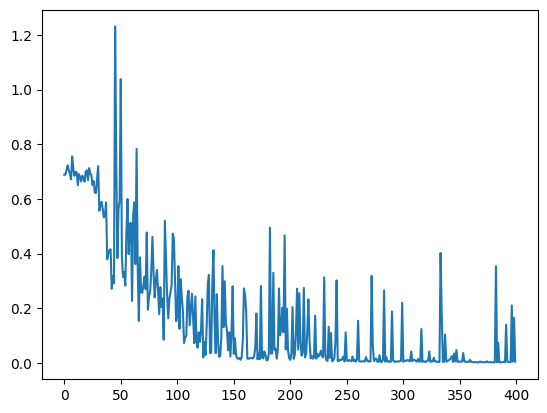

In [38]:
import matplotlib.pyplot as plt
plt.plot(new_losses)
plt.show();

In [39]:
input_tokens

{'input_ids': [[101, 1045, 2514, 10392, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2026, 2166, 2003, 2183, 2242, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2031, 2025, 6618, 2041, 2054, 1996, 4217, 2516, 2038, 2000, 2079, 2007, 1996, 3185, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

#### 14.

In [41]:
model.eval()

l = []

for test_text in test_texts:
    input_tokens = tokenizer([test_text], truncation=True, padding=True)
    outputs = model(torch.tensor(input_tokens['input_ids']).to(device))

    l.append(torch.argmax(outputs['logits'], axis=1).item())

correct_cnt = 0

for pred, ans in zip(l, test_labels):
    if pred == ans:
        correct_cnt += 1

print(correct_cnt/len(test_labels))

0.853


#### 15.

In [42]:
tp = 0
tn = 0
fp = 0
fn = 0


for pred, ans in zip(l, test_labels):

  # true positive
  if pred == ans:
    if pred ==1:
      tp += 1
    else:
      tn += 1

  # false negative
  elif pred == 0:
    fn += 1

  # false positive
  elif pred == 1:
    fp +=1


In [43]:
# recall
recall = tp/(tp+fn)
print(recall)

# precision
precision = tp/(tp+fp)
print(precision)

# f1-score
f_score = (2 * precision * recall) / (precision + recall)
print(f_score)

0.7682672233820459
0.9108910891089109
0.8335220838052094


#### 16.

In [44]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, l))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       521
           1       0.91      0.77      0.83       479

    accuracy                           0.85      1000
   macro avg       0.86      0.85      0.85      1000
weighted avg       0.86      0.85      0.85      1000

